- Decision Tree classifiers are attractive models if we care about interpretability.
- Based on the features in our training data, decision tree model learns a series of questions to infer the class labels of the samples.

- <p style='color:blue;font-size:16px;'>Using the decision tree algorithm we start at the tree root, and split the data on the feature that results in the largest __Information Gain(IG)__.</p>
- In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure.
- In practice, this can result in a very deep tree with many nodes, which can easily lead to __overfitting__. Thus, we typically want to __prune__ the tree by setting a max depth limit.

### Maximizing the Information Gain -- getting the most bang for your buck

In order to split the nodes at the most informative featues, we need to define an objective function that we want to optimize via the tree learning algorithm.<br>
Here, our __objective function is to maixmize the infromation gain at each split__, defined as follows:

<center >$IG\left (D_p,f\right) = I\left (D_p\right) - \sum_{j=1}^{m}\frac{N_j}{N_p}I\left(D_j\right)$</center>

Here,<br>
f - is the feauture to perform the split<br>
$D_p \space and \space D_j$ are the dataset of the _parent_ and jth child node<br>
I - is the __impurity measure__.<br>
$N_p$ is the total number of samples at parent node<br>
$N_j$ is the number of samples, in the jth child node.

__Information Gain__ -- __is simply the difference between the impurity of the parent node and the sum of the child node impurities.__
- The lower the impurity of the child nodes, the larger the Information Gain(IG)

For simplicity, and to reduce the combinatorial search space, most libaries(including scikit-learn) implement binary decision trees. This means each node is split two child nodes, $D_{left}$ and $D_{right}$:

<center style='color:blue;font-size:16px;'>$IG\left (D_p,f\right) = I\left (D_p\right) - \frac{N_{left}}{N_p}I\left(D_{left}\right) - \frac{N_{right}}{N_p}I\left(D_{right}\right)$</center>


Now, the three measures or __splitting criteria__ that are commonly used in binary decision trees are <br>

- __Gini Impurity($I_G$),__ <br>
- __Entropy($I_H$),__ and the <br>
- __Classification error($I_E$)__. 

### Entropy

<center>$ I_H(t) = - \sum_{i=1}^{c}p\left(i|t\right)\log_2p\left(i|t\right)$</center><br>
Here , $p\left(i|t\right)$ is the __proportion of the samples that belongs to class c for a particular node t.__
- __Note:__ Entropy is therefore maximal if we have a uniform class distribution and 0 if all the samples at a node belongs to the same class.

Therefore, we can say __entropy criterion attempts to maximize the mutual information in the tree.__

### Gini
the Gini impurity can be understood __as a criterion to minimize the probability of misclassification:__

<center>$I_G(t) = \sum_{i=1}^{c}p\left(i|t\right)\left(1-p\left(i|t\right)\right) \space = \space 1 - \sum_{i=1}^{c}p\left(i|t\right)^2$</center>
<br>similary, to entropy, the __Gini impurity is maximal if the classes are perfectly mixed__

__Note:__ <p style='color:blue;font-size:16px;'>in practice both Gini impurity and entropy typically yield very similar results, and it is often not worth spending much time on evaluation tree using differnt impurity criteria rather than experimenting with different pruning cut-offs<p>

### Classification Error

<center>$I_E = 1 - max \{ \space p (i|t)  \space \}$ <c/enter>

- Let us plot the impurity indices for the probability range [0,1] for class 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gini(p):
    return (p*(1-p)) + (1-p)*(1-(1-p))

In [3]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

In [31]:
def error(p):
    return 1- np.max([p, (1-p)])

In [32]:
x = np.arange(0.0, 1.0, 0.01)

In [33]:
ent = [ entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

In [54]:
fig = plt.figure()
ax = plt.subplot(111)

In [47]:
for i, lab, ls, c in zip([ent, scaled_ent,gini(x),err],
                      ['Entropy', 'Scaled[Entorpy]','Gini Impurity', 'Classification error'],
                      ['-','-','--','-.'],
                      ['black','lightgray','red','green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

In [7]:
x.shape

(100,)

In [48]:
ax.legend(loc='upper center', bbox_to_anchor= (0.5,1.15), 
         ncol=5, fancybox=True, shadow=False)

In [49]:
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

In [ ]:
plt.subplot()

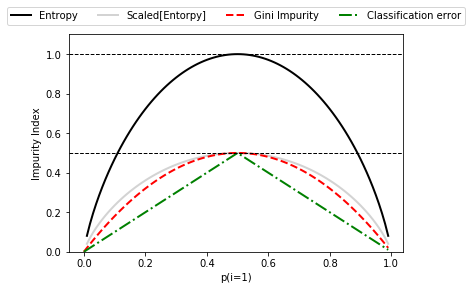

In [50]:
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

__Note :__ that we have also added a scaled version of the entropy (entropy/2) to observe that the __Gini impurity is an intermediate measure between entropy and the classification error.__


Q - what is the range of Entropy, gini Index<br>
Q - difference between Entory and gini impurity. <br>
Q - When to use gini impurity and when to use entropy